<a href="https://colab.research.google.com/github/advcloud/colabtest/blob/main/yolov5tea.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# clone YOLOv5 repository
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
# install dependencies as necessary
!pip install -qr requirements.txt  # install dependencies (ignore errors)
import torch

from IPython.display import Image, clear_output  # to display images

# clear_output()
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

Cloning into 'yolov5'...
remote: Enumerating objects: 12281, done.
remote: Total 12281 (delta 0), reused 0 (delta 0), pack-reused 12281
Receiving objects: 100% (12281/12281), 12.02 MiB | 32.92 MiB/s, done.
Resolving deltas: 100% (8475/8475), done.
/content/yolov5
     |████████████████████████████████| 596 kB 16.4 MB/s 
Setup complete. Using torch 1.11.0+cu113 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15109MB, multi_processor_count=40)


In [ ]:

from google.colab import files

uploaded = files.upload()
pt_path = list(uploaded.keys())[0]

Saving model_- 17 june 2022 13_08.pt to model_- 17 june 2022 13_08.pt


In [2]:
#claireye.com.tw
#pt_path ='/content/drive/MyDrive/Github/tea/model.pt'
#yaml_path ='/content/drive/MyDrive/Github/tea/teadata.yaml'
#jpg_path ='/content/drive/MyDrive/Github/tea/testtea.jpg'

In [3]:
%cd /content
!pip install git+https://github.com/advcloud/colablibm.git
!git clone https://github.com/advcloud/colablib1.git
%cd colablib1
import webcam
import libmediacar1

/content
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/advcloud/colablibm.git to /tmp/pip-req-build-ky5u01_f
  Running command git clone -q https://github.com/advcloud/colablibm.git /tmp/pip-req-build-ky5u01_f
     |████████████████████████████████| 32.8 MB 1.3 MB/s 
  Created wheel for colablibm: filename=colablibm-1.0-py3-none-any.whl size=1351 sha256=47db3b0343d54d0e0b28bc48c0e6fa5ace0a42130eb791f717e8cd2d6470d70d
  Stored in directory: /tmp/pip-ephem-wheel-cache-l2dpj3mc/wheels/f9/a7/b3/05fe44ff04c2d7e572c3ebf5d58ae7f5f0d53edde1d4aba60b
Successfully built colablibm
Cloning into 'colablib1'...
remote: Enumerating objects: 25, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 25 (delta 7), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (25/25), done.
/content/colablib1


/content/colablib1


<IPython.core.display.Javascript object>

(480, 640)
Saved to claireye.jpg


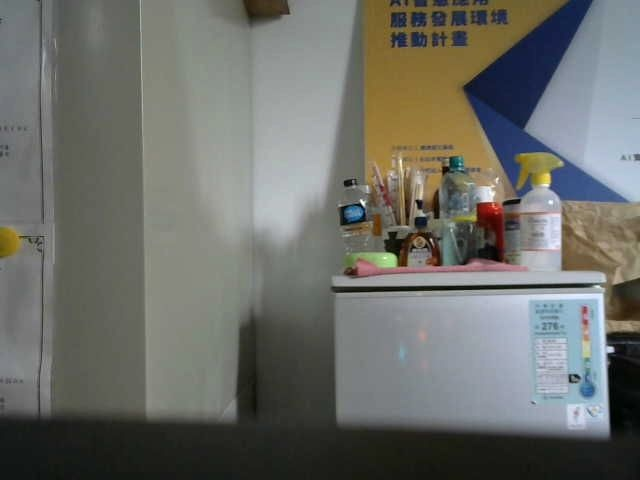

In [ ]:
%cd /content/colablib1
try:
  filename = webcam.take_photo(webcam.ifile_path)
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  webcam.display(webcam.Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [ ]:
jpg_path ='/content/colablib1/claireye.jpg'

In [ ]:
%cd /content/yolov5/
uploaded = files.upload()
yaml_path = list(uploaded.keys())[0]

/content/yolov5


Saving data.yaml to data.yaml


In [ ]:
#%cd /content/yolov5/
#from google.colab import files

#uploaded = files.upload()
#jpg_path = list(uploaded.keys())[0]

/content/yolov5


Saving 2022-06-14_20-49-39-097_jpg.rf.00ed5d3928a85b65fa03e19d229ff932.jpg to 2022-06-14_20-49-39-097_jpg.rf.00ed5d3928a85b65fa03e19d229ff932.jpg


In [4]:
# use the best weights!
%cd /content/yolov5/
#!python detect.py --weights runs/train/yolov5s_results/weights/best.pt --conf 0.5 --source ../colablib1/claireye.jpg
!python detect.py --weights $pt_path --conf 0.4 --iou-thres 0.5 --source $jpg_path --data $yaml_path 

/content/yolov5
detect: weights=['/content/drive/MyDrive/Github/tea/model.pt'], source=/content/drive/MyDrive/Github/tea/testtea.jpg, data=/content/drive/MyDrive/Github/tea/teadata.yaml, imgsz=[640, 640], conf_thres=0.4, iou_thres=0.5, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-261-g19f33cb Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 290 layers, 20852934 parameters, 0 gradients
image 1/1 /content/drive/MyDrive/Github/tea/testtea.jpg: 640x640 1 defect, Done. (0.029s)
Speed: 0.7ms pre-process, 29.4ms inference, 35.6ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp


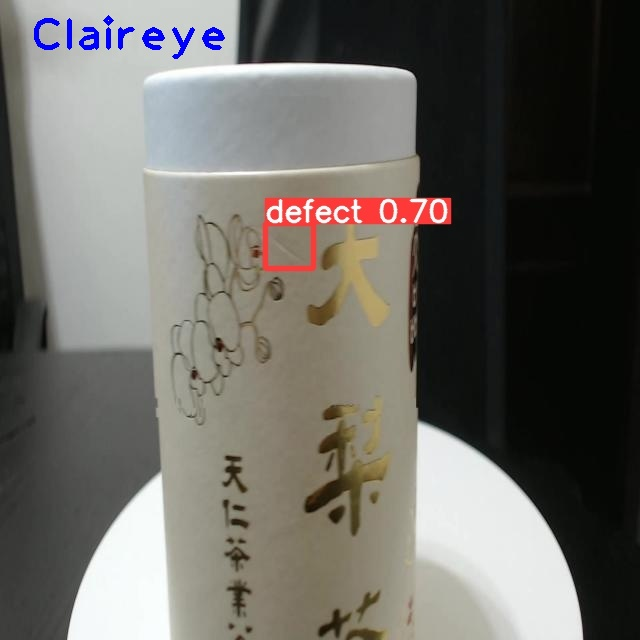

In [5]:
files=[]
for name in sorted(libmediacar1.glob.glob('/content/yolov5/runs/detect/exp/*.jpg')):
    files.append(name)
images = {name: libmediacar1.cv2.imread(name) for name in files}  
for name, image in images.items():
    libmediacar1.cv2.putText(image,'Claireye',(30,50), libmediacar1.cv2.FONT_HERSHEY_PLAIN,3,(255,0,0),3  )
    libmediacar1.cv2.imwrite(name, image)
    display(Image(filename=name))
    print("\n")


In [7]:
#claireye.com.tw
stopa = 6
%cd /content/colablib1

/content/colablib1


In [8]:
uploaded = files.upload()
video_path = list(uploaded.keys())[0]

Saving tea6s.mp4 to tea6s.mp4


In [9]:
if libmediacar1.os.path.isdir('images'):
    libmediacar1.shutil.rmtree('images')
 
libmediacar1.os.makedirs('images', exist_ok=True)

libmediacar1.video_2_images(video_path,libmediacar1.st,libmediacar1.intv,(libmediacar1.stop1*stopa))
jpgall_path ='/content/colablib1/images'

In [11]:
# use the best weights!
%cd /content/yolov5/
#!python detect.py --weights runs/train/yolov5s_results/weights/best.pt --conf 0.5 --source ../colablib1/claireye.jpg
!python detect.py --weights $pt_path --conf 0.5 --iou-thres 0.5 --source $jpgall_path --data $yaml_path 

/content/yolov5
detect: weights=['/content/drive/MyDrive/Github/tea/model.pt'], source=/content/colablib1/images, data=/content/drive/MyDrive/Github/tea/teadata.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.5, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-261-g19f33cb Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 290 layers, 20852934 parameters, 0 gradients
image 1/171 /content/colablib1/images/000000.png: 384x640 Done. (0.022s)
image 2/171 /content/colablib1/images/000001.png: 384x640 Done. (0.022s)
image 3/171 /content/colablib1/images/000002.png: 384x640 Done. (0.022s)
image 4/171 /content/colablib1/images/000003.png: 384x640 Done. (0.022s)
image 5/171 /conten

In [13]:
%cd /content
if libmediacar1.os.path.exists('./output.mp4'):
   libmediacar1.os.remove('./output.mp4')
files=[]
for name in sorted(libmediacar1.glob.glob('/content/yolov5/runs/detect/exp2/*.png')):
    files.append(name)
images = {name: libmediacar1.cv2.imread(name) for name in files}  
for name, image in images.items():
    libmediacar1.cv2.putText(image,'Claireye',(30,50), libmediacar1.cv2.FONT_HERSHEY_PLAIN,3,(255,0,0),3  )
    libmediacar1.cv2.imwrite(name, image)
!ffmpeg -r $libmediacar1.stopa -i /content/yolov5/runs/detect/exp2/%6d.png\
               -vcodec libx264 -pix_fmt yuv420p output.mp4

/content
ffmpeg version 3.4.11-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --